In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
df1 = pd.read_csv('./Scraped Data/all jobs part 1 2020-05-30.csv')
df2 = pd.read_csv('./Scraped Data/all jobs part 2 2020-05-30.csv')

In [23]:
job_trends = pd.concat([
    df1,df2
],ignore_index=True).drop_duplicates().reset_index(drop=True)

In [24]:
job_trends.head(5)

,Primary_Key,Title,Company,Location,Salary,Ratings,Remote_work,Date_posted,Full_Description
0,5a5a6bb65133edb5,Auto Service Advisor,A-Protect Warranty Corporation,"Concord, ON","$40,000 - $60,000 a year",None,None,Just posted,A-Protect Warranty Corp is looking for an auto...
1,2e73a22f30099b50,HR Administrator,Fresh mind solutions,"Toronto, ON",None,None,None,Just posted,Looking for experienced IT Sales person for ou...
2,e066713b39ecbfba,Labour Relations Manager,Metro Inc.,"Toronto, ON",None,3.6,None,Just posted,Position Title:|Labour Relations Manager|Requi...
3,792e556f0f07c6b2,Barista,Second Cup @ Bathurst/Lawrence,"North York, ON",$14 - $15 an hour,None,None,Just posted,Second Cup is looking for a responsible and en...
4,afa8e00305ac0667,General Labourer - $14.50/HR,Capital Staffing Solutions Inc.,"Toronto, ON",$14.50 an hour,4.4,None,Just posted,Location:|Etobicoke (Kipling and The Queensway...


In [25]:
job_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29155 entries, 0 to 29154
Data columns (total 9 columns):
Primary_Key         29155 non-null object
Title               29155 non-null object
Company             29155 non-null object
Location            29155 non-null object
Salary              29155 non-null object
Ratings             29155 non-null object
Remote_work         29155 non-null object
Date_posted         29155 non-null object
Full_Description    29155 non-null object
dtypes: object(9)
memory usage: 2.0+ MB


In [26]:
primary_key_count = job_trends.Primary_Key.value_counts()

In [27]:
# Print all the primary_key_count > 0 (1 or more)
print([primary_key_count>0])

[6c932b3a15903193    True
3f5ee7766235fc05    True
817f129fa695399a    True
feab47c25fb86039    True
ad6b5f3fe1c571ec    True
                    ... 
39ae9b4571c6f260    True
ca69c5b82563cb7c    True
efbb9cb48db807f9    True
d4a04eba6636537e    True
ba55ff0275159d30    True
Name: Primary_Key, Length: 29155, dtype: bool]


In [28]:
# Print all the primary_key_count > 1 (2 or more)
print(primary_key_count[primary_key_count>1])

Series([], Name: Primary_Key, dtype: int64)


In [29]:
# we don't need to data mine primary key: so drop it (it's purpose has been filled)
# job_trends = job_trends.drop(columns=['Primary_Key'])
# full description is computation heavy, so we will explore it later
# job_trends_NoDesc = job_trends.drop(columns=['Full_Description'])

In [30]:
job_trends.describe(include='all')

,Primary_Key,Title,Company,Location,Salary,Ratings,Remote_work,Date_posted,Full_Description
count,29155,29155,29155,29155,29155,29155,29155,29155,29155
unique,29155,21437,15660,2959,3033,42,2,32,27672
top,6c932b3a15903193,Customer Service Representative,Randstad,"Calgary, AB",None,None,None,1 day ago,None
freq,1,109,171,1427,16579,12011,26970,7938,97


## Title NLP

In [31]:
title_df = job_trends[['Primary_Key', 'Title']] 

In [32]:
title_df.head(5)

,Primary_Key,Title
0,5a5a6bb65133edb5,Auto Service Advisor
1,2e73a22f30099b50,HR Administrator
2,e066713b39ecbfba,Labour Relations Manager
3,792e556f0f07c6b2,Barista
4,afa8e00305ac0667,General Labourer - $14.50/HR


In [33]:
# fix this error later
title_df.loc[:,'length'] = title_df['Title'].apply(len)

C:\Users\aujla\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\aujla\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [34]:
title_df.describe(include='all')

,Primary_Key,Title,length
count,29155,29155,29155.000000
unique,29155,21437,NaN
top,6c932b3a15903193,Customer Service Representative,NaN
freq,1,109,NaN
mean,NaN,NaN,29.702281
std,NaN,NaN,15.194788
min,NaN,NaN,2.000000
25%,NaN,NaN,19.000000
50%,NaN,NaN,27.000000
75%,NaN,NaN,37.000000


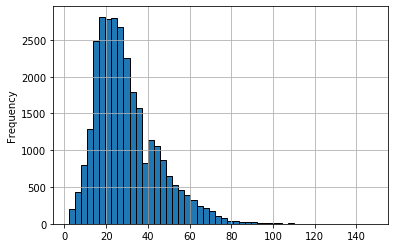

In [35]:
title_df['length'].plot(bins=50, kind='hist',edgecolor='black',linewidth='1', grid=True)

In [137]:
title_df.length.describe()

count    29155.000000
mean        29.702281
std         15.194788
min          2.000000
25%         19.000000
50%         27.000000
75%         37.000000
max        148.000000
Name: length, dtype: float64

In [144]:
title_df[title_df['length'] < 10]['Title'].iloc[0]

'Barista'